In [2]:
import spacy
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from collections import Counter
import os
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
data = pd.read_csv('../data/dataset_limpio.csv')
data.head()

,text_limpio,label
0,donald trump white house chaos try cover russi...,0
1,donald trump presumptive gop nominee time reme...,0
2,mike pence huge homophobe support ex gay conve...,0
3,san francisco reuters california attorney gene...,1
4,twisted reasoning come pelosi day especially p...,0


In [38]:
# Eliminar filas donde 'text_limpio' sea nulo
data = data.dropna(subset=['text_limpio']).reset_index(drop=True)

# Verificar que ya no haya nulos
print(data.isna().sum())  # debe dar 0

text_limpio    0
label          0
dtype: int64


In [62]:
tokens = [t.split() for t in data['text_limpio']]
label = [labels for labels in data['label']]

In [63]:
print(tokens[0:1])

[['donald', 'trump', 'white', 'house', 'chaos', 'try', 'cover', 'russia', 'problem', 'mount', 'hour', 'refuse', 'acknowledge', 'problem', 'surround', 'fake', 'news', 'hoax', 'fact', 'bear', 'thing', 'differently', 'crack', 'congressional', 'public', 'grassley', 'iowa', 'head', 'senate', 'judiciary', 'committee', 'feed', 'demand', 'donald', 'trump', 'jr', 'trump', 'campaign', 'manager', 'paul', 'manafort', 'testify', 'committee', 'infamous', 'shady', 'meeting', 'donald', 'trump', 'shady', 'russian', 'lawyer', 'promise', 'dirt', 'democratic', 'presidential', 'nominee', 'hillary', 'clinton', 'fact', 'information', 'demand', 'send', 'signal', 'team', 'trump', 'notably', 'fire', 'special', 'counsel', 'robert', 'mueller', 'circumstance', 'despite', 'fact', 'trump', 'white', 'house', 'lay', 'groundwork', 'speak', 'tweet', 'grassley', 'warning', 'think', 'senator', 'grassley', 'rest', 'senate', 'need', 'look', 'warning', 'give', 'trump', 'jr', 'manafort', 'follow', 'order', 'serve', 'subpoena'

In [58]:
def word_count_por_lista(limpiar_textos, labels):
    falsas_listas = []
    verdaderas_listas = []
    
    # Separar las noticias por etiqueta, manteniendo listas de palabras
    for palabras, label in zip(limpiar_textos, labels):
        if label == 0:
            falsas_listas.append(palabras)
        elif label == 1:
            verdaderas_listas.append(palabras)
    
    # Contar frecuencia de palabras aplanando las listas
    count_falsas = Counter([w for sublist in falsas_listas for w in sublist])
    count_verdaderas = Counter([w for sublist in verdaderas_listas for w in sublist])
    
    # Palabra más frecuente (evita error si lista vacía)
    palabra_mas_falsa = count_falsas.most_common(1)[0] if count_falsas else None
    palabra_mas_verdadera = count_verdaderas.most_common(1)[0] if count_verdaderas else None
    
    return falsas_listas, verdaderas_listas, palabra_mas_falsa, palabra_mas_verdadera


In [47]:
def generar_ngrams_slicing(lista_de_tokens, n):
    """
    Genera n-gramas usando slicing de listas, sin nltk.
    """
    ngrams_totales = []
    for palabras in lista_de_tokens:
        for i in range(len(palabras) - n + 1):
            gram = "_".join(palabras[i:i+n])
            ngrams_totales.append(gram)
    return ngrams_totales

In [41]:
def nube_ngrams(ngrams, titulo, carpeta="../Resultados"):

    os.makedirs(carpeta, exist_ok=True)

    texto = " ".join(ngrams)

    nube = WordCloud(
        width=800,
        height=400,
        background_color='white',
        collocations=False
    ).generate(texto)

    ruta = os.path.join(carpeta, f"{titulo}.png")
    nube.to_file(ruta)

    plt.figure(figsize=(12,6))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo)
    plt.show()

    print("Guardado en:", ruta)

In [65]:
falsas, verdaderas, palabra_falsa, palabra_verdadera = word_count_por_lista(tokens, label)

print(f"La palabra que más se repite en noticias falsas es: {palabra_falsa[0]} ({palabra_falsa[1]} veces)")
print(f"La palabra que más se repite en noticias verdaderas es: {palabra_verdadera[0]} ({palabra_verdadera[1]} veces)") 

La palabra que más se repite en noticias falsas es: trump (65016 veces)
La palabra que más se repite en noticias verdaderas es: say (106815 veces)


Verdaderas n-gramas

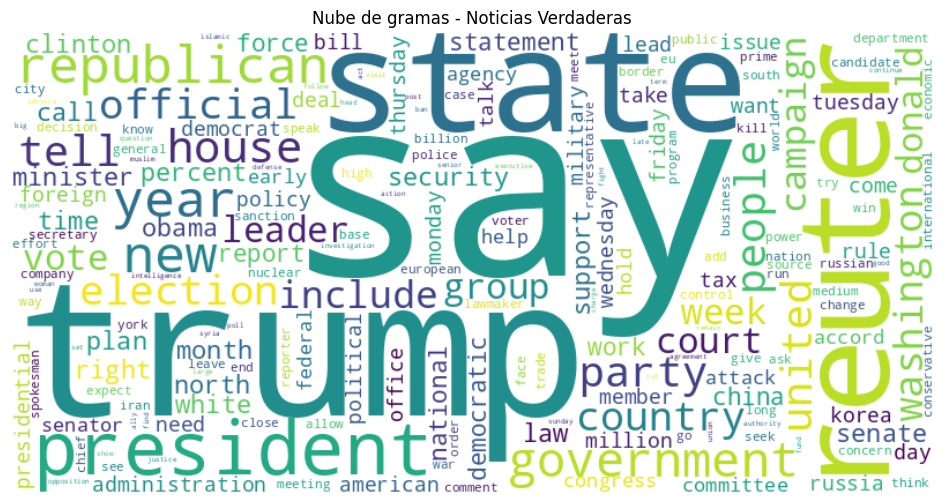

Guardado en: ../Resultados\Nube de gramas - Noticias Verdaderas.png


In [78]:
gramas_verd_1 = generar_ngrams_slicing(verdaderas, 1)
nube_ngrams(gramas_verd_1, "Nube de gramas - Noticias Verdaderas")

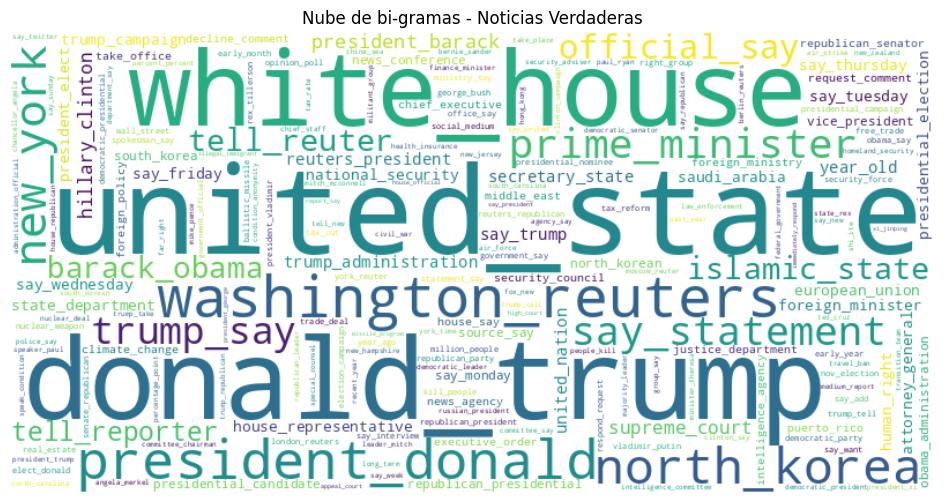

Guardado en: ../Resultados\Nube de bi-gramas - Noticias Verdaderas.png


In [79]:
gramas_verd_2 = generar_ngrams_slicing(verdaderas, 2)
nube_ngrams(gramas_verd_2, "Nube de bi-gramas - Noticias Verdaderas")

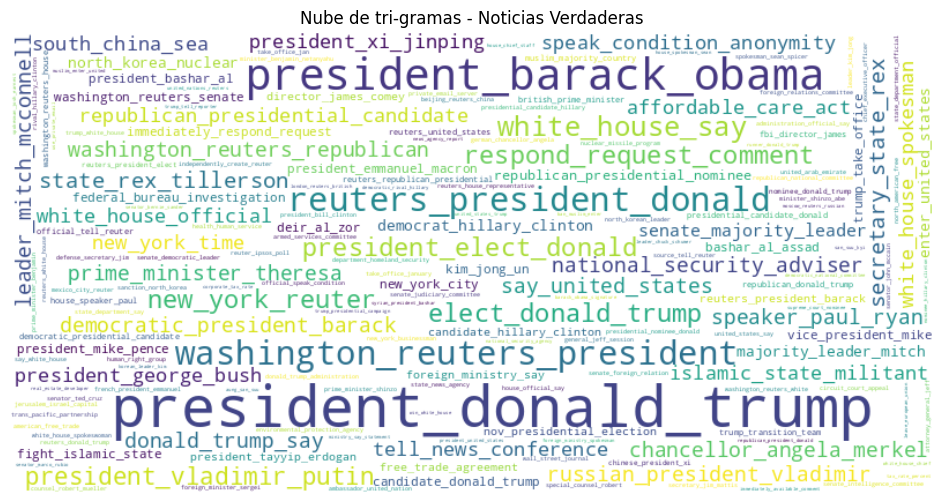

Guardado en: ../Resultados\Nube de tri-gramas - Noticias Verdaderas.png


In [80]:
gramas_verd_3 = generar_ngrams_slicing(verdaderas, 3)
nube_ngrams(gramas_verd_3, "Nube de tri-gramas - Noticias Verdaderas")

Falsas n-gramas

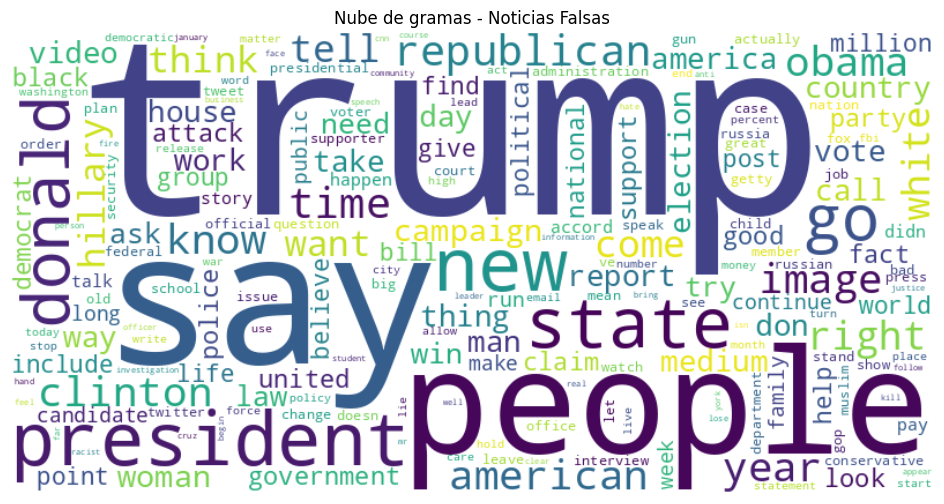

Guardado en: ../Resultados\Nube de gramas - Noticias Falsas.png


In [81]:
gramas_falsas_1 = generar_ngrams_slicing(falsas, 1)
nube_ngrams(gramas_falsas_1, "Nube de gramas - Noticias Falsas")

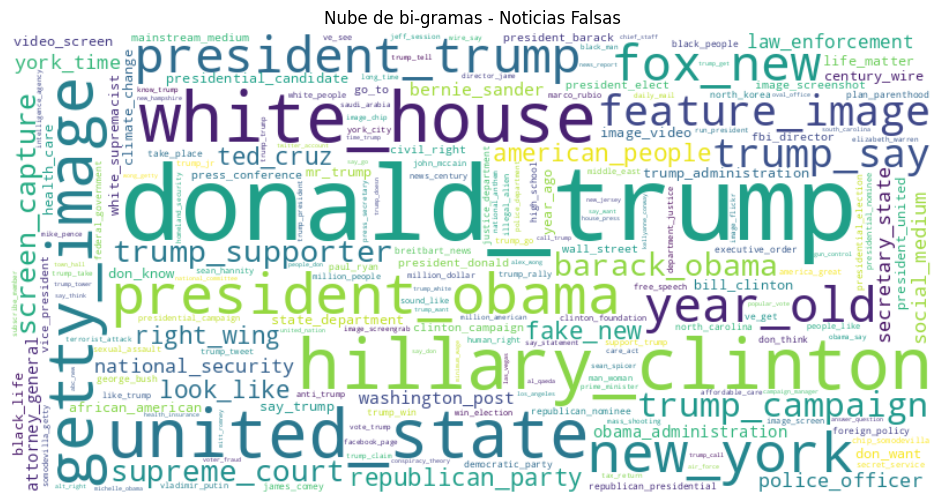

Guardado en: ../Resultados\Nube de bi-gramas - Noticias Falsas.png


In [82]:
gramas_falsas_2 = generar_ngrams_slicing(falsas, 2)
nube_ngrams(gramas_falsas_2, "Nube de bi-gramas - Noticias Falsas")

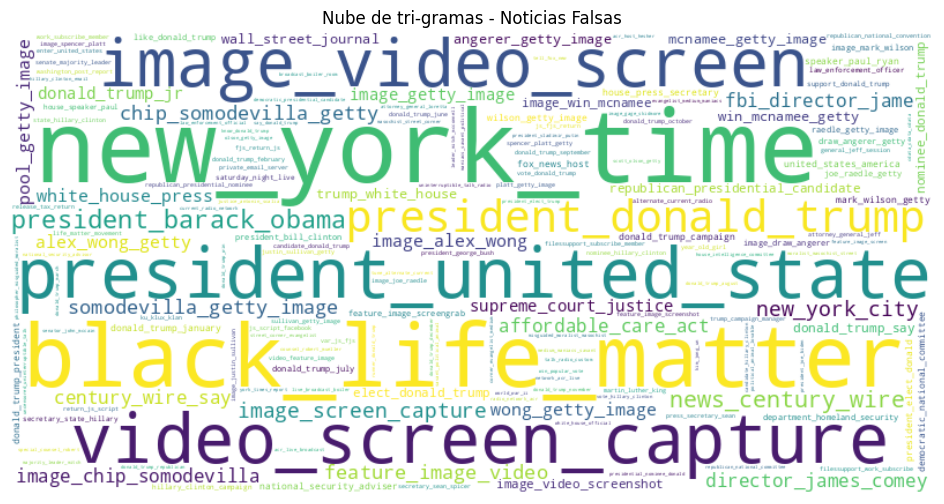

Guardado en: ../Resultados\Nube de tri-gramas - Noticias Falsas.png


In [83]:
gramas_falsas_3 = generar_ngrams_slicing(falsas, 3)
nube_ngrams(gramas_falsas_3, "Nube de tri-gramas - Noticias Falsas")